# Import Data and Modules

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
from copy import deepcopy

In [2]:
ls

README.txt                        watch_output_fashion.csv
Watches4.ipynb                    watch_output_luxury2.csv
battle_wins.ipynb                 watch_output_military.csv
df3_dummied.csv                   watch_output_sport.csv
df_watches.csv                    watches.ipynb
final_watches.ipynb               watches2.ipynb
watch_classification_final.ipynb  watches3.ipynb
watch_output.csv                  watches_category.csv
watch_output2.csv                 watches_final.pkl
watch_output_casual.csv           watches_final2.pkl
watch_output_dive.csv             watcheslinks.csv
watch_output_dress.csv


In [4]:
df = pd.read_pickle('watches_final2.pkl')

# Explore Data

## Dimensions

In [5]:
df.shape

(8673, 26)

In [6]:
df.head()

,case_material_fixed,sku,case_shape,bezel,case_diameter_fixed,clasp_fixed,brand,case_thickness_fixed,band_material_fixed,model,...,crown_fixed,water_resistance,functions_fixed,band_width,crystal_fixed,watch_label,watch_style,features_fixed,dial_color_fixed,gender
0,other,PK-5951P001,Rectangle,other,37.3,tang,Patek Philippe,0.00,Unknown,5951P-001,...,screw down,30,"Hour, Minute",0.0,Scratch Resistant Sapphire,Swiss Made,Luxury Watches,other,Black,Unisex
1,titanium,AP26587TIOOD031CA01,Round,other,44.0,fold over,Audemars Piguet,16.15,Unknown,26587TI.OO.D031CA.01,...,screw down,100,other,0.0,Scratch Resistant Sapphire,Swiss Made,Luxury Watches,other,other,Mens
2,other,PK-5959P011,Round,fixed,33.0,deployment,Patek Philippe,0.00,Crocodile,5959P-011,...,pull,30,"Hour, Minute",16.0,Scratch Resistant Sapphire,Swiss Made,Luxury Watches,other,Black,Unisex
3,other,PK-6102P-001,Round,fixed,44.0,tang,Patek Philippe,0.00,Alligator,6102P-001,...,other,30,"Hour, Minute, Second",0.0,Scratch Resistant Sapphire,Swiss Made,Luxury Watches,other,Blue,Mens
4,rose gold,PK-52041R001,Round,fixed,40.0,other,Patek Philippe,14.30,Rose Gold,5204/1R-001,...,other,30,"Hour, Minute, Second",0.0,Scratch Resistant Sapphire,Swiss Made,Luxury Watches,other,Black,Mens


In [7]:
df.isna().sum()

case_material_fixed     0
sku                     0
case_shape              0
bezel                   0
case_diameter_fixed     0
clasp_fixed             0
brand                   0
case_thickness_fixed    0
band_material_fixed     0
model                   0
dial_type               0
movement                0
engine                  0
hands_fixed             0
price_fixed             0
calendar                0
crown_fixed             0
water_resistance        0
functions_fixed         0
band_width              0
crystal_fixed           0
watch_label             0
watch_style             0
features_fixed          0
dial_color_fixed        0
gender                  0
dtype: int64

In [8]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8673 entries, 0 to 8681
Data columns (total 26 columns):
case_material_fixed     8673 non-null object
sku                     8673 non-null object
case_shape              8673 non-null object
bezel                   8673 non-null object
case_diameter_fixed     8673 non-null float64
clasp_fixed             8673 non-null object
brand                   8673 non-null object
case_thickness_fixed    8673 non-null float64
band_material_fixed     8673 non-null object
model                   8673 non-null object
dial_type               8673 non-null object
movement                8673 non-null object
engine                  8673 non-null object
hands_fixed             8673 non-null object
price_fixed             8673 non-null object
calendar                8673 non-null object
crown_fixed             8673 non-null object
water_resistance        8673 non-null int64
functions_fixed         8673 non-null object
band_width              8673 non-null

## To Do Before Charting

### rearrange columns

In [10]:
new_columns_sorted = sorted(list(df.columns))

In [11]:
df = df[new_columns_sorted]

### turn prices from strings to floats

In [13]:
# get rid of commas
df['price_fixed'] = df['price_fixed'].apply(lambda x: x.replace(',', ''))

In [14]:
# check if there are watches with price of 0
count = 0
for i in df['price_fixed']:
    if '.' not in i:
        print(f'Index: {count}, Price: {i}', '\n')
    count += 1

Index: 1514, Price: 0 

Index: 2169, Price: 0 

Index: 2508, Price: 0 

Index: 2534, Price: 0 

Index: 2559, Price: 0 

Index: 2797, Price: 0 

Index: 3073, Price: 0 

Index: 3279, Price: 0 

Index: 3505, Price: 0 

Index: 3655, Price: 0 

Index: 4298, Price: 0 

Index: 4389, Price: 0 

Index: 4517, Price: 0 

Index: 4581, Price: 0 

Index: 5478, Price: 0 

Index: 5613, Price: 0 

Index: 5652, Price: 0 

Index: 5847, Price: 0 

Index: 6498, Price: 0 

Index: 6647, Price: 0 

Index: 7012, Price: 0 

Index: 7581, Price: 0 

Index: 8352, Price: 0 



In [15]:
# there shouldn't be watches with a price of 0
test_df = df[df['price_fixed'] == '0']

In [17]:
test_df.shape

(23, 26)

In [78]:
# we'll turn this into our test set
test_df.to_pickle('test_watches.pkl')

In [18]:
# get rid of test set
df = df[df['price_fixed'] != '0']

In [19]:
# reset index
df.reset_index(inplace = True)

In [20]:
# find prices which don't have a period
df['price_fixed'].str.split('.', expand=True)[1].isna().sum()

0

In [24]:
#get rid of cents for price_fixed
df['price_fixed'] = df['price_fixed'].str[:-3]

In [26]:
df['price_fixed'] = pd.to_numeric(df['price_fixed'])

In [27]:
df['price_fixed']

0       547771
1       316799
2       350000
3       311850
4       323200
         ...  
8645       145
8646       200
8647       595
8648       140
8649       410
Name: price_fixed, Length: 8650, dtype: int64

### Turn everything lower cased

In [28]:
# drop column created from import
df.drop(columns = ['index'], inplace=True)

In [29]:
cols = list(df.columns)

In [30]:
cols_remove = ['band_width', 'case_diameter_fixed', 'case_thickness_fixed', 'price_fixed', 'water_resistane']

In [31]:
cols_numeric = cols_remove

In [32]:
df1 = deepcopy(df)

In [33]:
#turn all to lower case
df = df.apply(lambda x: x.astype(str).str.lower())

In [34]:
cols_numeric

['band_width',
 'case_diameter_fixed',
 'case_thickness_fixed',
 'price_fixed',
 'water_resistane']

In [35]:
pd.to_numeric(df['band_width'])

0        0.0
1        0.0
2       16.0
3        0.0
4        0.0
        ... 
8645    22.0
8646     0.0
8647    18.0
8648    14.0
8649     0.0
Name: band_width, Length: 8650, dtype: float64

In [37]:
cols_numeric

['band_width',
 'case_diameter_fixed',
 'case_thickness_fixed',
 'price_fixed',
 'water_resistane']

In [41]:
cols_numeric.remove('water_resistane')

In [43]:
for i in cols_numeric:
    df[i] = pd.to_numeric(df[i])

In [49]:
# check places
type(df['band_width'][12])

numpy.float64

In [50]:
#fix water resistance
df['water_resistance'] = pd.to_numeric(df['water_resistance'])

## Find Correlations

In [51]:
df.corr()

,band_width,case_diameter_fixed,case_thickness_fixed,price_fixed,water_resistance
band_width,1.000000,0.349209,0.472442,-0.229653,0.099807
case_diameter_fixed,0.349209,1.000000,0.382242,-0.010248,0.214092
case_thickness_fixed,0.472442,0.382242,1.000000,-0.093609,0.156621
price_fixed,-0.229653,-0.010248,-0.093609,1.000000,-0.009255
water_resistance,0.099807,0.214092,0.156621,-0.009255,1.000000


In [ ]:
#at what level does correlations become too high?


## Transformations

### round to whole numbers

In [52]:
#band_width
df['band_width'] = df['band_width'].round()

In [53]:
#case_diameter_fixed
df['case_diameter_fixed'] = df['case_diameter_fixed'].round()

In [54]:
#case_thickness_fixed
df['case_thickness_fixed'] = df['case_thickness_fixed'].round()

In [55]:
df['water_resistance'].value_counts()

50      2505
100     2425
30      2298
200      643
300      369
150       83
0         67
10        61
500       53
1000      40
60        37
600       20
3         15
120        9
20         5
25         5
3000       5
3900       3
777        2
1200       2
90         1
1500       1
4000       1
Name: water_resistance, dtype: int64

In [56]:
df['water_resistance'].round(100).value_counts()

50      2505
100     2425
30      2298
200      643
300      369
150       83
0         67
10        61
500       53
1000      40
60        37
600       20
3         15
120        9
20         5
25         5
3000       5
3900       3
777        2
1200       2
90         1
1500       1
4000       1
Name: water_resistance, dtype: int64

In [57]:
def custom_round(x, base = 50):
    return int(base*round(float(x)/base))

In [58]:
#applying rounding to 50
df['water_resistance'].apply(custom_round).value_counts()

50      4840
100     2435
200      643
300      369
0        153
150       83
500       53
1000      40
600       20
3000       5
3900       3
1200       2
800        2
1500       1
4000       1
Name: water_resistance, dtype: int64

In [59]:
#round using our function
df['water_resistance'] = df['water_resistance'].apply(custom_round)

In [61]:
df['price_fixed'].apply(custom_round).value_counts()

400      389
600      382
700      356
500      347
1000     318
        ... 
24800      1
20750      1
16700      1
33100      1
16400      1
Name: price_fixed, Length: 593, dtype: int64

In [62]:
# By rounding to nearest $50, we halve the number of values for price

In [63]:
df['price_fixed'] = df['price_fixed'].apply(custom_round)

# Chart

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
#get value counts
dict(df['band_material_fixed'].value_counts())

{'stainless steel': 2616,
 'unknown': 2188,
 'leather': 2011,
 'rubber': 331,
 'alligator': 331,
 'silicone': 255,
 'gold': 250,
 'crocodile': 138,
 'ceramic': 131,
 'rose gold': 104,
 'polyurethane': 75,
 'nylon': 38,
 'wood': 32,
 'titanium': 32,
 'nato nylon': 23,
 'resin': 22,
 'satin': 21,
 'alloy': 19,
 'fabric': 18,
 'textile': 15}

In [256]:
#create list of dictionaries that have value counts
list_of_bar_charts = []
for i in list(df.columns):
    list_of_bar_charts.append(dict(df[i].value_counts()))

In [284]:
names_and_dicts = zip(list(df.columns), list_of_bar_charts)

In [285]:
list_of_bar_charts[0]

{'stainless steel': 2616,
 'unknown': 2188,
 'leather': 2011,
 'alligator': 331,
 'rubber': 331,
 'silicone': 255,
 'gold': 250,
 'crocodile': 138,
 'ceramic': 131,
 'rose gold': 104,
 'polyurethane': 75,
 'nylon': 38,
 'wood': 32,
 'titanium': 32,
 'nato nylon': 23,
 'resin': 22,
 'satin': 21,
 'alloy': 19,
 'fabric': 18,
 'textile': 15}

In [262]:
list_of_bar_charts[0]

{'stainless steel': 2616,
 'unknown': 2188,
 'leather': 2011,
 'alligator': 331,
 'rubber': 331,
 'silicone': 255,
 'gold': 250,
 'crocodile': 138,
 'ceramic': 131,
 'rose gold': 104,
 'polyurethane': 75,
 'nylon': 38,
 'wood': 32,
 'titanium': 32,
 'nato nylon': 23,
 'resin': 22,
 'satin': 21,
 'alloy': 19,
 'fabric': 18,
 'textile': 15}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

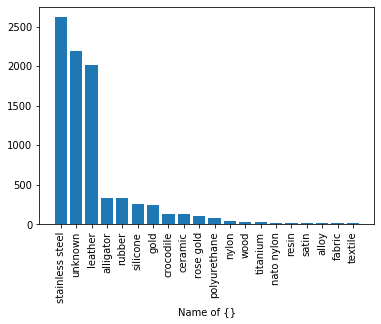

In [271]:
plt.bar(list_of_bar_charts[0].keys(), list_of_bar_charts[0].values())
plt.xlabel('Name of {}')
plt.xticks(fontsize= 10, rotation = 90)




In [274]:
list_of_bar_charts[:5]

[{'stainless steel': 2616,
  'unknown': 2188,
  'leather': 2011,
  'alligator': 331,
  'rubber': 331,
  'silicone': 255,
  'gold': 250,
  'crocodile': 138,
  'ceramic': 131,
  'rose gold': 104,
  'polyurethane': 75,
  'nylon': 38,
  'wood': 32,
  'titanium': 32,
  'nato nylon': 23,
  'resin': 22,
  'satin': 21,
  'alloy': 19,
  'fabric': 18,
  'textile': 15},
 {0.0: 2033,
  22.0: 1459,
  20.0: 1447,
  18.0: 785,
  24.0: 454,
  16.0: 376,
  21.0: 370,
  14.0: 237,
  23.0: 230,
  19.0: 204,
  26.0: 161,
  15.0: 148,
  17.0: 134,
  30.0: 93,
  12.0: 92,
  25.0: 74,
  13.0: 48,
  28.0: 48,
  27.0: 39,
  32.0: 38,
  35.0: 31,
  10.0: 24,
  31.0: 23,
  11.0: 23,
  29.0: 23,
  8.0: 10,
  9.0: 10,
  39.0: 7,
  5.0: 6,
  7.0: 6,
  6.0: 4,
  4.0: 4,
  2.0: 2,
  36.0: 2,
  33.0: 2,
  34.0: 1,
  37.0: 1,
  45.0: 1},
 {'fixed': 5488, 'other': 2390, 'rotating': 772},
 {'invicta': 645,
  'tissot': 456,
  'omega': 415,
  'movado': 313,
  'longines': 297,
  'rado': 284,
  'rolex': 238,
  'jbw': 215,
  

In [288]:
for j,i in names_and_dicts:
    if len(i) <= 20:
        plt.bar(i.keys(), i.values())
        plt.xlabel(f'{j}')
        plt.xticks(fontsize= 10, rotation = 90)
        plt.show()

In [291]:
for j,i in names_and_dicts:
    print(j)
    print(i)
    

In [290]:
names_and_dicts

In [254]:
df['band_material_fixed']

0               unknown
1               unknown
2             crocodile
3             alligator
4             rose gold
             ...       
8645            leather
8646    stainless steel
8647    stainless steel
8648            leather
8649            leather
Name: band_material_fixed, Length: 8650, dtype: object

# Dummy Variables

In [70]:
test_df = deepcopy(df)

In [71]:
test_df.columns

Index(['band_material_fixed', 'band_width', 'bezel', 'brand', 'calendar',
       'case_diameter_fixed', 'case_material_fixed', 'case_shape',
       'case_thickness_fixed', 'clasp_fixed', 'crown_fixed', 'crystal_fixed',
       'dial_color_fixed', 'dial_type', 'engine', 'features_fixed',
       'functions_fixed', 'gender', 'hands_fixed', 'model', 'movement',
       'price_fixed', 'sku', 'watch_label', 'watch_style', 'water_resistance'],
      dtype='object')

In [72]:
test_df['band_material_fixed']

0               unknown
1               unknown
2             crocodile
3             alligator
4             rose gold
             ...       
8645            leather
8646    stainless steel
8647    stainless steel
8648            leather
8649            leather
Name: band_material_fixed, Length: 8650, dtype: object

In [75]:
# create dummy variables for 'band_material_fixed'
band_material_fixed = pd.get_dummies(test_df['band_material_fixed'])

In [76]:
list_of_columns = []

In [77]:
list_of_columns.append(band_material_fixed)

In [80]:
# create a function to make dummy variables 
dummy_columns = list(test_df.columns)

In [86]:
test_df.describe()

,band_width,case_diameter_fixed,case_thickness_fixed,price_fixed,water_resistance
count,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000
mean,15.580347,39.803237,9.055145,4830.092486,98.491329
std,9.287588,6.665098,5.527015,15528.774186,146.973087
min,0.000000,0.000000,0.000000,100.000000,0.000000
25%,12.000000,36.000000,7.000000,600.000000,50.000000
50%,20.000000,41.000000,10.000000,1100.000000,50.000000
75%,22.000000,44.000000,13.000000,3550.000000,100.000000
max,45.000000,66.000000,92.000000,547750.000000,4000.000000


In [87]:
cols_remove = ['band_width', 'case_diameter_fixed', 'case_thickness_fixed', 'price_fixed', 'water_resistance']